Análisis de Datos 202016908A_1704/Tarea 3

Árbol de Decision

Jalil Aviles 202016908_86

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [135]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
data.shape

(1599, 12)

In [31]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [33]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 457., 1064.,   35.,   18.,    3.,    8.,   10.,    2.,    0.,
           2.]),
 array([0.012 , 0.0719, 0.1318, 0.1917, 0.2516, 0.3115, 0.3714, 0.4313,
        0.4912, 0.5511, 0.611 ]),
 <BarContainer object of 10 artists>)

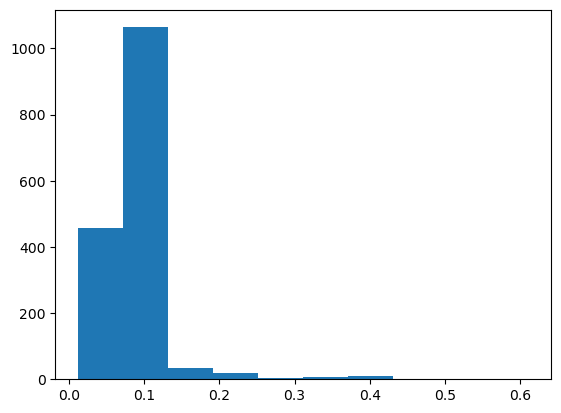

In [57]:
plt.hist(data.chlorides)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(array([151., 855., 416., 118.,  32.,  15.,   4.,   4.,   0.,   4.]),
 array([0.33 , 0.497, 0.664, 0.831, 0.998, 1.165, 1.332, 1.499, 1.666,
        1.833, 2.   ]),
 <BarContainer object of 10 artists>)

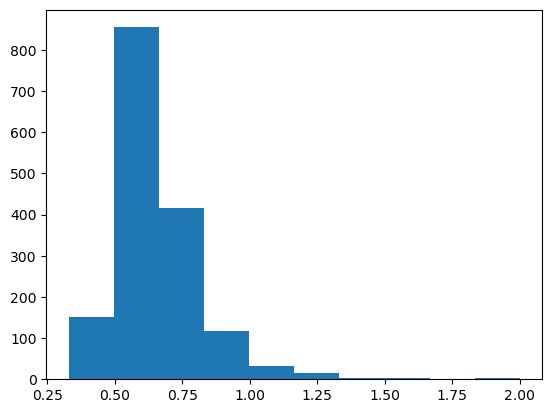

In [74]:
plt.hist(data.sulphates)

<Axes: xlabel='volatile acidity', ylabel='citric acid'>

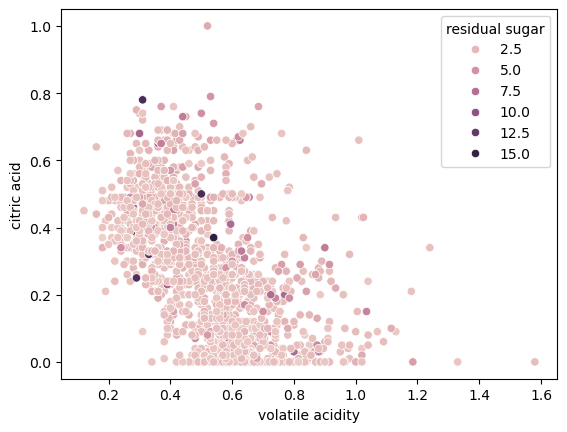

In [161]:
sns.scatterplot(x = "volatile acidity", y = "citric acid", hue = "residual sugar", data = data)

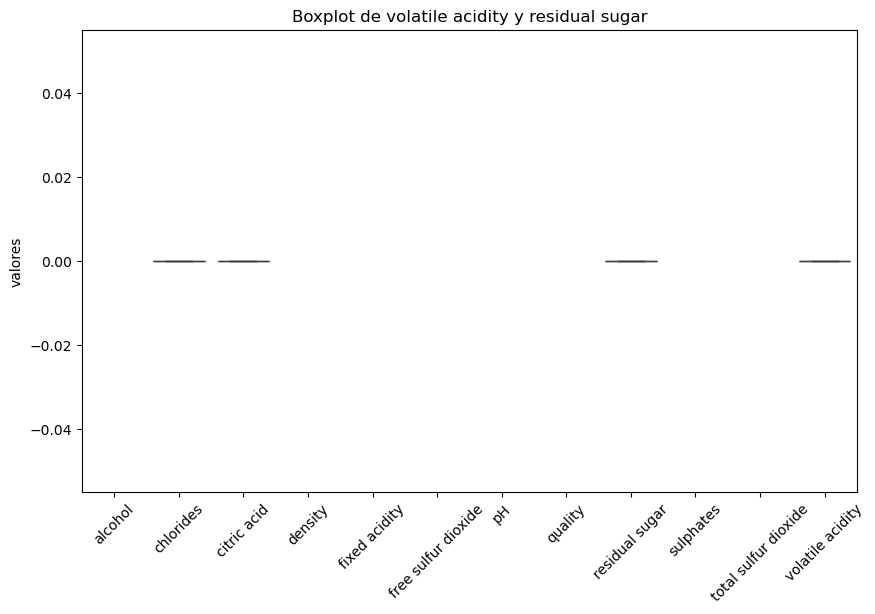

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(data-data[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides']])
plt.xticks(rotation=45)
plt.title('Boxplot de volatile acidity y residual sugar')
plt.ylabel('valores')
plt.show()


 ##fixed acidity   
 ##volatile acidity      
 ##citric acid           
 ##residual sugar        
 ##chlorides             
 ##free sulfur dioxide   
 ##total sulfur dioxide  
 ##density              
 ##pH                   
 ##sulphates            
 ##alcohol              
 ##quality    

In [105]:
predictors_col = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides']
target_col = ['citric acid']

In [85]:
predictors = data[predictors_col]
target = data[target_col]

In [107]:
predictors

,volatile acidity,citric acid,residual sugar,chlorides
0,0.700,0.00,1.9,0.076
1,0.880,0.00,2.6,0.098
2,0.760,0.04,2.3,0.092
3,0.280,0.56,1.9,0.075
4,0.700,0.00,1.9,0.076
...,...,...,...,...
1594,0.600,0.08,2.0,0.090
1595,0.550,0.10,2.2,0.062
1596,0.510,0.13,2.3,0.076
1597,0.645,0.12,2.0,0.075


In [109]:
target

,citric acid
0,0.00
1,0.00
2,0.04
3,0.56
4,0.00
...,...
1594,0.08
1595,0.10
1596,0.13
1597,0.12


In [111]:
corr = predictors.corr()
corr

,volatile acidity,citric acid,residual sugar,chlorides
volatile acidity,1.000000,-0.552496,0.001918,0.061298
citric acid,-0.552496,1.000000,0.143577,0.203823
residual sugar,0.001918,0.143577,1.000000,0.055610
chlorides,0.061298,0.203823,0.055610,1.000000


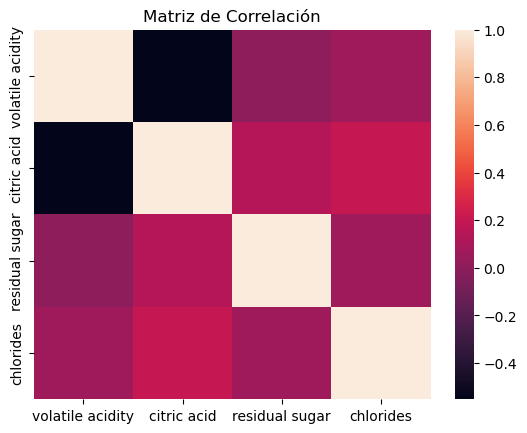

In [137]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

NameError: name 'train_test_split' is not defined